In [ ]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import tensorflow as tf
#import tensorflow.keras.backend as K
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from tensorflow import keras
import itertools
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from torch.utils.data import DataLoader # for dataloaders
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
import torch
import random

In [ ]:
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
from google.colab import files #add .json file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
import zipfile
import os
from kaggle.cli import main
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle datasets download -d harshart/dataset-alpha2

 99% 1.15G/1.16G [00:19<00:00, 84.9MB/s]
100% 1.16G/1.16G [00:20<00:00, 62.1MB/s]


In [ ]:
zip_ref = zipfile.ZipFile('dataset-alpha2.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
new_model = tf.keras.models.load_model('/content/my_best_plant_identifier_model_97.01.epoch16-loss0.09.hdf5')
#new_model.summary()

In [ ]:
apple_model = tf.keras.models.load_model('/content/Apple_Avg_20_Final_99.3.h5')
#apple_model.summary()

In [ ]:
strawberry_model = tf.keras.models.load_model('/content/strawberryAvg-20-Final_96.8.h5')
tomato_model = tf.keras.models.load_model('/content/Tomato_Avg_20_Final_95.03.hdf5')
cherry_model = tf.keras.models.load_model('/content/Cherry_Avg-20-Final_99.54.h5')
peach_model = tf.keras.models.load_model('/content/Peach_Avg-20-Final_98.88.h5')
potato_model = tf.keras.models.load_model('/content/Potato_Avg_20_Final_99.58.h5')
grape_model = tf.keras.models.load_model('/content/Grape_Avg_20_Final_97.67.h5')
bp_model = tf.keras.models.load_model('/content/BP_Avg-20-Final_95.4.h5')
corn_model = tf.keras.models.load_model('/content/Corn_Avg_20_Final_97.9.hdf5')

In [ ]:
plant_classes = ['Apple',
                 'Bell pepper',
                 'Cherry',
                 'Corn',
                 'Grape',
                 'Peach',
                 'Potato',
                 'Strawberry',
                 'Tomato']

In [ ]:
apple_classes = ['Apple___Apple_scab',
                 'Apple___Black_rot',
                 'Apple___Cedar_apple_rust',
                 'Apple___healthy']

tomato_classes = [ 'Tomato___Bacterial_spot',
                   'Tomato___Early_blight',
                   'Tomato___Late_blight',
                   'Tomato___Leaf_Mold',
                   'Tomato___Septoria_leaf_spot',
                   'Tomato___Spider_mites Two-spotted_spider_mite',
                   'Tomato___Target_Spot',
                   'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
                   'Tomato___Tomato_mosaic_virus',
                   'Tomato___healthy']

potato_classes = [ 'Potato___Early_blight',
                   'Potato___Late_blight',
                   'Potato___healthy']

grape_classes = ['Grape___Black_rot',
                 'Grape___Esca_(Black_Measles)',
                 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
                 'Grape___healthy']

bellpeper_classes= ['Pepper,_bell___Bacterial_spot',
                    'Pepper,_bell___healthy']

corn_classes = ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
                'Corn_(maize)___Common_rust_',
                'Corn_(maize)___Northern_Leaf_Blight',
                'Corn_(maize)___healthy']

cherry_classes = ['Cherry_(including_sour)___Powdery_mildew',
                  'Cherry_(including_sour)___healthy']

strawberry_classes = ['Strawberry___Leaf_scorch',
                      'Strawberry___healthy']

peach_classes = ['Peach___Bacterial_spot',
                 'Peach___healthy']


In [ ]:
test_dir = "/tmp/Dataset alpha2/valid"

In [ ]:
test_it = tf.keras.utils.image_dataset_from_directory( directory= test_dir,
                                                      batch_size=32,
                                                      image_size=(128, 128))

Found 15231 files belonging to 9 classes.


In [ ]:
rescale = Rescaling(scale=1./255)
test_set  = test_it.map(lambda image,label:(rescale(image),label))

In [ ]:
labels = []
predictions = []
for x,y in test_set:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(new_model.predict(x),1).numpy())

1/1 [==============================] - 0s 258ms/step


In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
#print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Test Accuracy   : 97.01 %
Precision Score : 97.01 %
Recall Score    : 97.01 %


In [ ]:
def apple(image):
  prediction = apple_model.predict(img)
  probabilty = prediction.flatten()
  max_prob = probabilty.max()
  index=prediction.argmax(axis=-1)[0]
  print(apple_classes[index])

def tomato(image):
  prediction = tomato_model.predict(img)
  probabilty = prediction.flatten()
  max_prob = probabilty.max()
  index=prediction.argmax(axis=-1)[0]
  print(tomato_classes[index])

def strawberry(image):
  prediction = strawberry_model.predict(img)
  probabilty = prediction.flatten()
  max_prob = probabilty.max()
  index=prediction.argmax(axis=-1)[0]
  print(strawberry_classes[index])


def bellpepper(image):
  prediction = bp_model.predict(img)
  probabilty = prediction.flatten()
  max_prob = probabilty.max()
  index=prediction.argmax(axis=-1)[0]
  print(bellpeper_classes[index])

def cherry(image):
  prediction = cherry_model.predict(img)
  probabilty = prediction.flatten()
  max_prob = probabilty.max()
  index=prediction.argmax(axis=-1)[0]
  print(cherry_classes[index])

def corn(image):
  prediction = corn_model.predict(img)
  probabilty = prediction.flatten()
  max_prob = probabilty.max()
  index=prediction.argmax(axis=-1)[0]
  print(corn_classes[index])

def grape(image):
  prediction = grape_model.predict(img)
  probabilty = prediction.flatten()
  max_prob = probabilty.max()
  index=prediction.argmax(axis=-1)[0]
  print(grape_classes[index])

def peach(image):
  prediction = peach_model.predict(img)
  probabilty = prediction.flatten()
  max_prob = probabilty.max()
  index=prediction.argmax(axis=-1)[0]
  print(peach_classes[index])

def potato(image):
  prediction = potato_model.predict(img)
  probabilty = prediction.flatten()
  max_prob = probabilty.max()
  index=prediction.argmax(axis=-1)[0]
  print(potato_classes[index])

In [ ]:
directory='/tmp/Dataset alpha2/test/test'
files = [os.path.join(directory,p) for p in sorted(os.listdir(directory))]

In [ ]:
image_path = ('/tmp/Dataset alpha2/valid/Peach/06fdeacf-ac44-4af3-9541-25c77806b8e1___Rutg._HL 3549.JPG')
new_img =keras.utils.load_img(image_path, target_size=(128, 128))
img = keras.utils.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

In [ ]:
prediction = new_model.predict(img)
probabilty = prediction.flatten()
max_prob = probabilty.max()
index=prediction.argmax(axis=-1)[0]
class_name = plant_classes[index]
class_name

1/1 [==============================] - 0s 27ms/step


'Peach'

In [ ]:
def DiseasedorHealthy(class_name,img):
    match class_name:
        case 'Apple':
            return apple(image)
        case 'Tomato':
            return tomato(image)
        case 'Strawberry':
            return strawberry(image)
        case 'Bell pepper':
            return bellpepper(image)
        case 'Cherry':
            return cherry(image)
        case 'Corn':
            return corn(image)
        case 'Grape':
            return grape(image)
        case 'Peach':
            return peach(image)
        case 'Potato':
            return potato(image)
        case default:
            return "grow something good"

#DiseasedorHealthy(class_name,image)

In [ ]:
image_path = ('/tmp/Dataset alpha2/valid/Grape/17572261-c800-42b7-8baf-2f73f7657578___Mt.N.V_HL 9009_new30degFlipLR.JPG')
new_img =keras.utils.load_img(image_path, target_size=(128, 128))
img = keras.utils.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

In [ ]:
def finalout(img,class_name):
  prediction = new_model.predict(img)
  probabilty = prediction.flatten()
  max_prob = probabilty.max()
  index=prediction.argmax(axis=-1)[0]
  class_name = plant_classes[index]

  DiseasedorHealthy(class_name,img)
  return class_name +" "+ image_path
finalout(img,class_name)

1/1 [==============================] - 0s 25ms/step
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)


'Grape /tmp/Dataset alpha2/valid/Grape/17572261-c800-42b7-8baf-2f73f7657578___Mt.N.V_HL 9009_new30degFlipLR.JPG'

In [ ]:
test_images = sorted(os.listdir(test_dir)) # since images in test folder are in alphabetical order
test_images

['Apple',
 'Bell pepper',
 'Cherry',
 'Corn',
 'Grape',
 'Peach',
 'Potato',
 'Strawberry',
 'Tomato']

1/1 [==============================] - 0s 135ms/step


<Figure size 1500x1000 with 0 Axes>

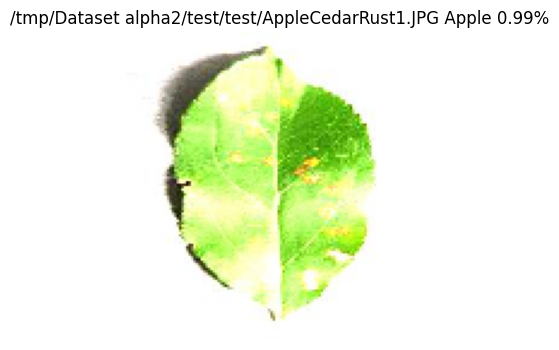

1/1 [==============================] - 0s 43ms/step


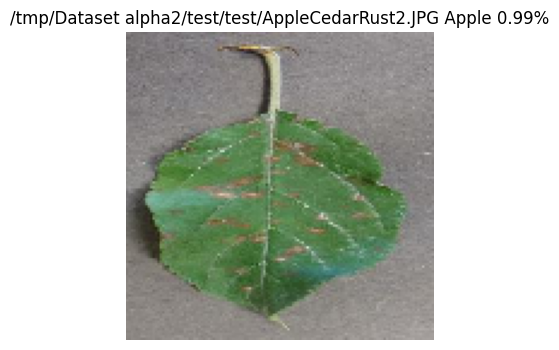

1/1 [==============================] - 0s 44ms/step


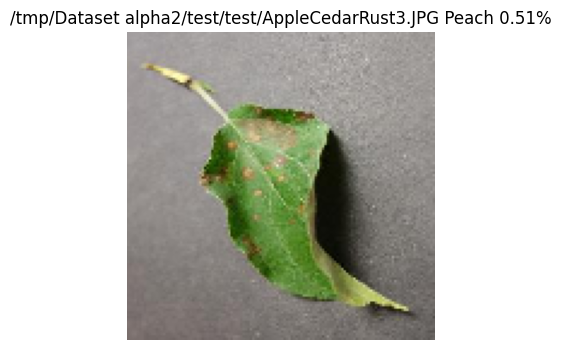

1/1 [==============================] - 0s 120ms/step


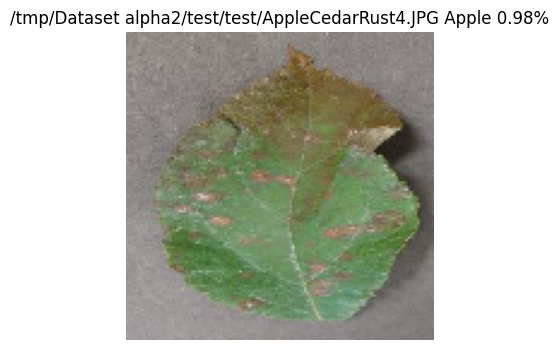

1/1 [==============================] - 0s 89ms/step


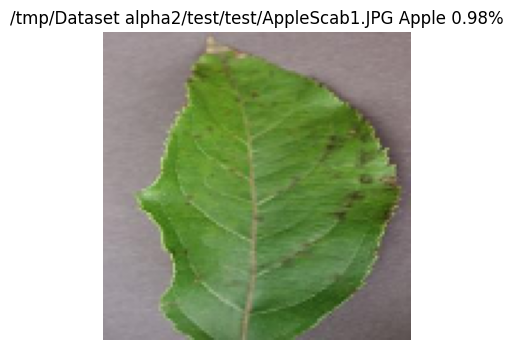

1/1 [==============================] - 0s 59ms/step


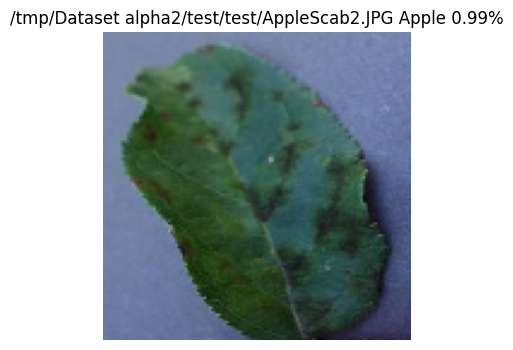

1/1 [==============================] - 0s 44ms/step


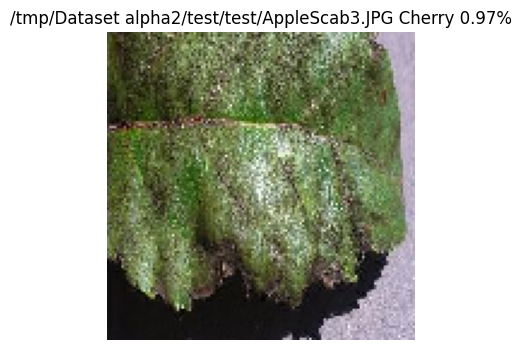

1/1 [==============================] - 0s 43ms/step


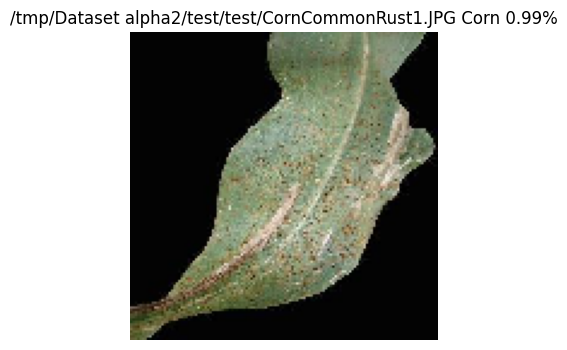

1/1 [==============================] - 0s 46ms/step


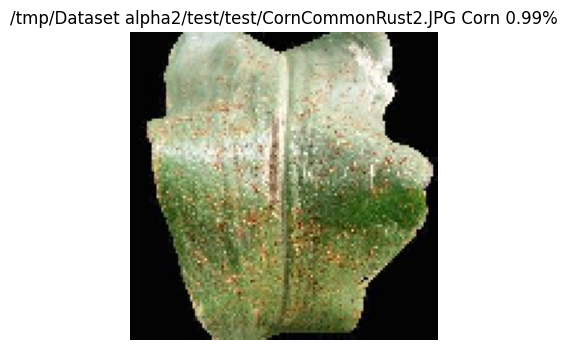

1/1 [==============================] - 0s 55ms/step


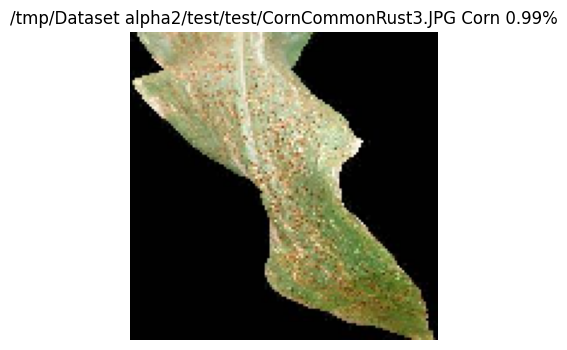

1/1 [==============================] - 0s 46ms/step


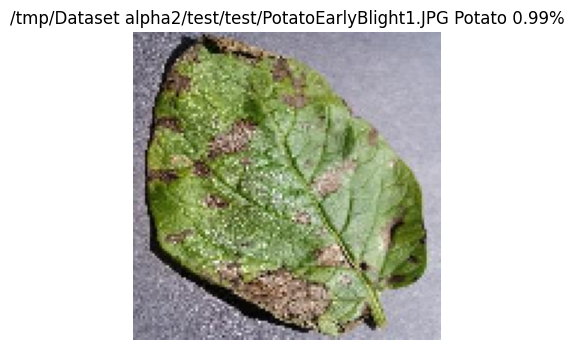

1/1 [==============================] - 0s 44ms/step


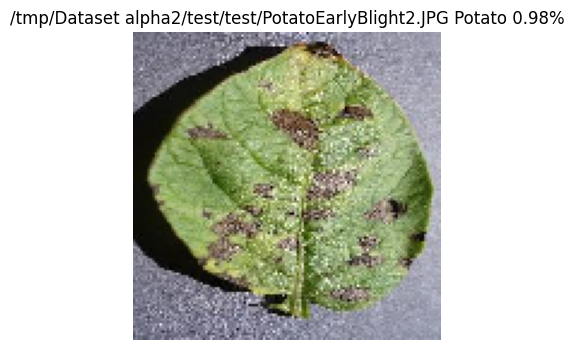

1/1 [==============================] - 0s 51ms/step


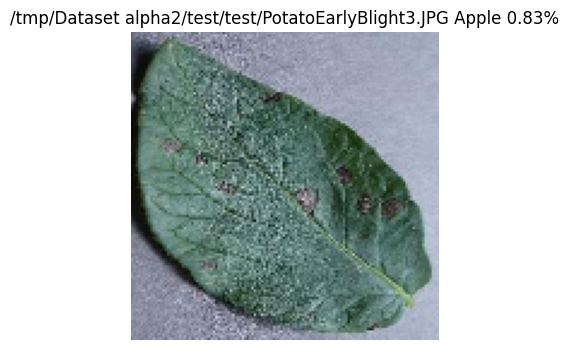

1/1 [==============================] - 0s 27ms/step


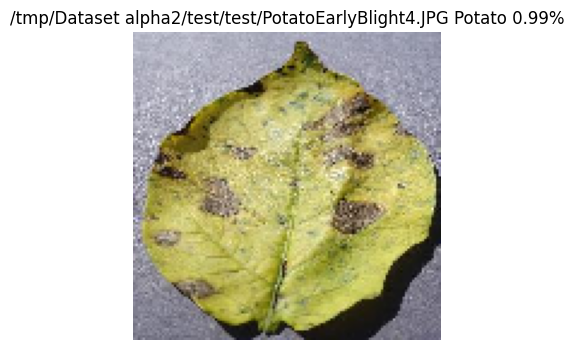

1/1 [==============================] - 0s 43ms/step


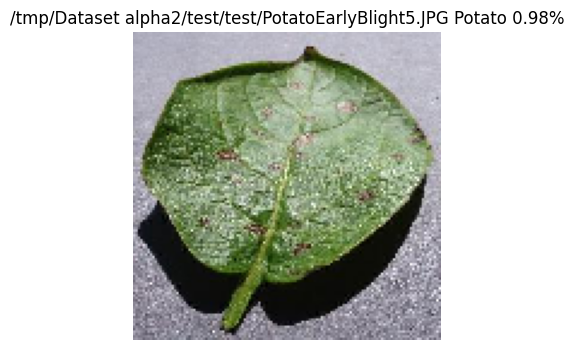

1/1 [==============================] - 0s 38ms/step


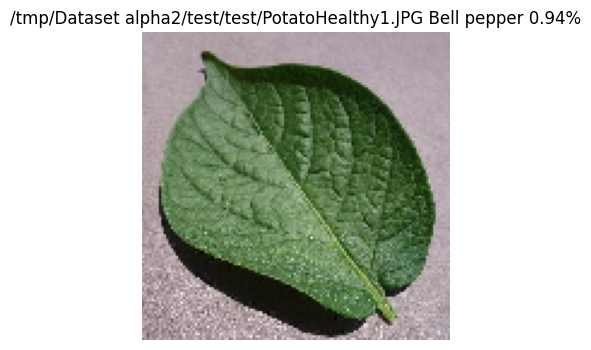

1/1 [==============================] - 0s 35ms/step


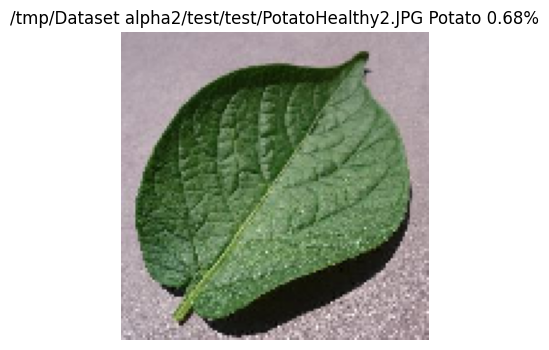

1/1 [==============================] - 0s 40ms/step


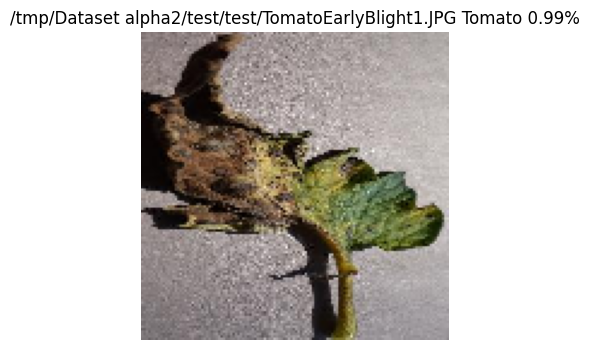

1/1 [==============================] - 0s 53ms/step


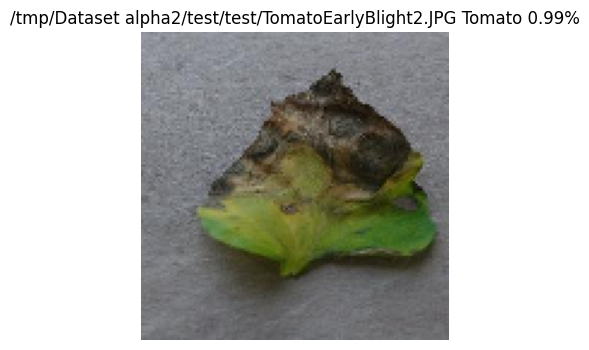

1/1 [==============================] - 0s 36ms/step


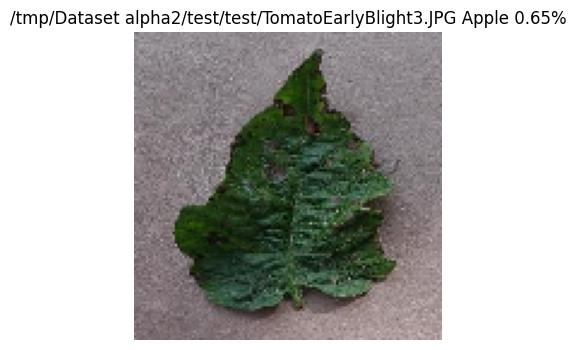

1/1 [==============================] - 0s 37ms/step


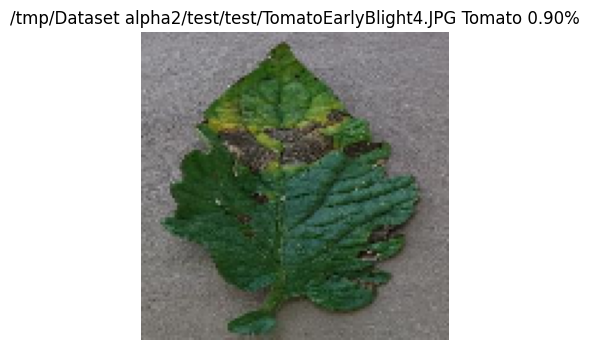

1/1 [==============================] - 0s 40ms/step


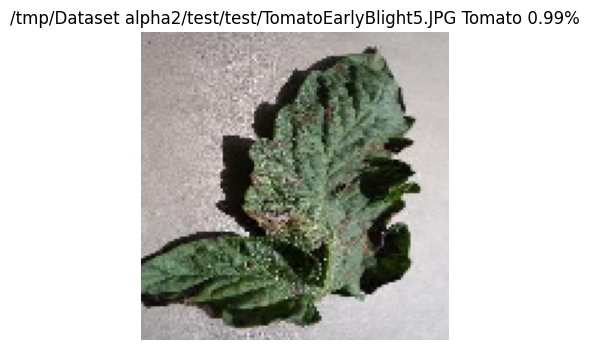

1/1 [==============================] - 0s 54ms/step


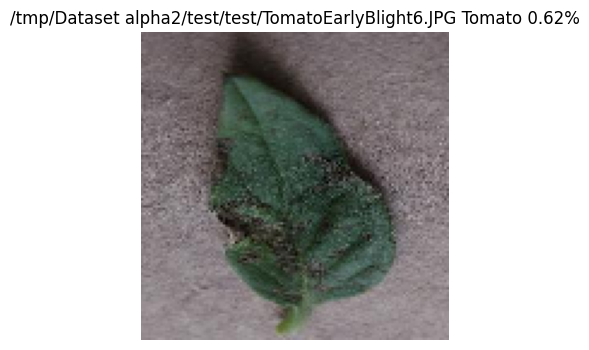

1/1 [==============================] - 0s 58ms/step


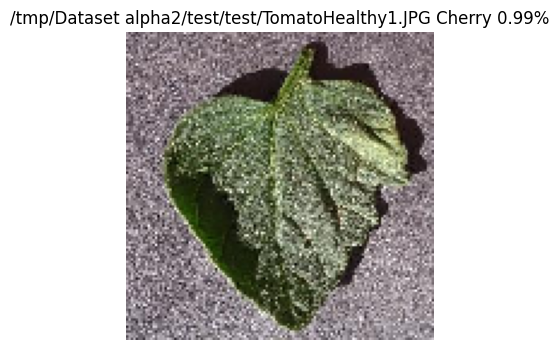

1/1 [==============================] - 0s 64ms/step


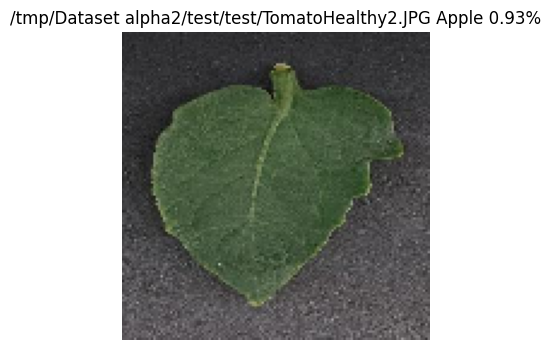

1/1 [==============================] - 0s 63ms/step


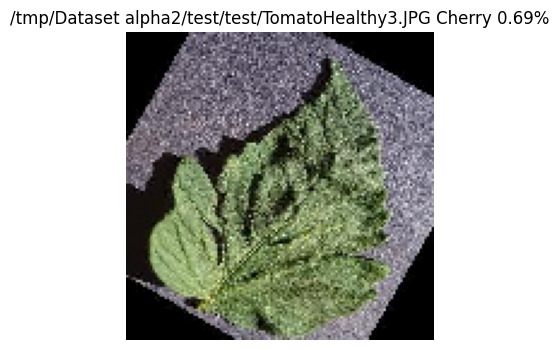

1/1 [==============================] - 0s 58ms/step


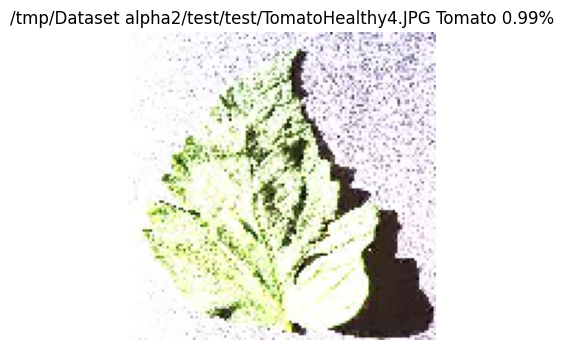

1/1 [==============================] - 0s 77ms/step


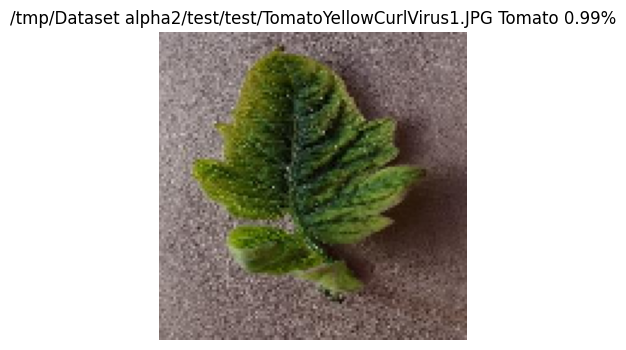

1/1 [==============================] - 0s 57ms/step


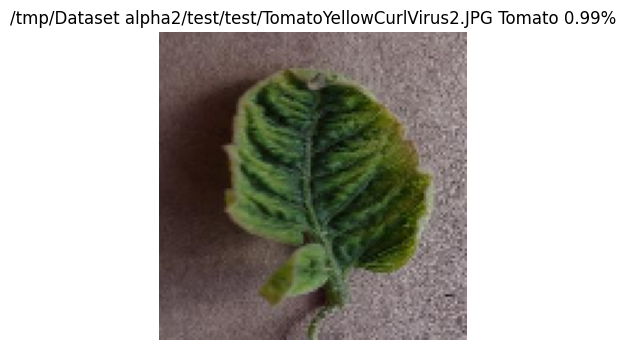

1/1 [==============================] - 0s 67ms/step


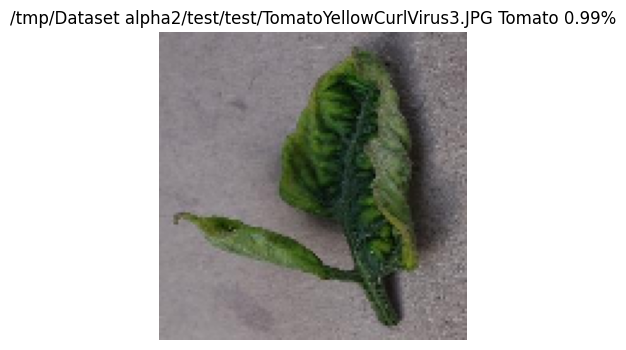

1/1 [==============================] - 0s 48ms/step


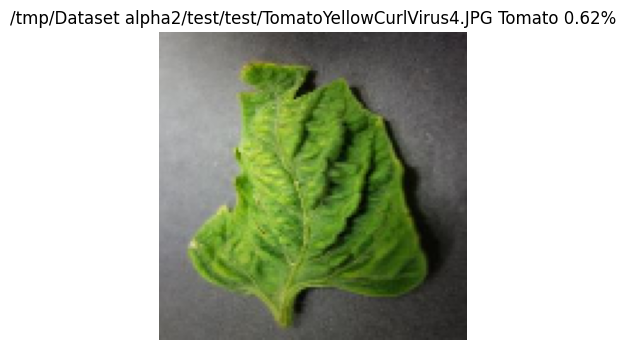

1/1 [==============================] - 0s 51ms/step


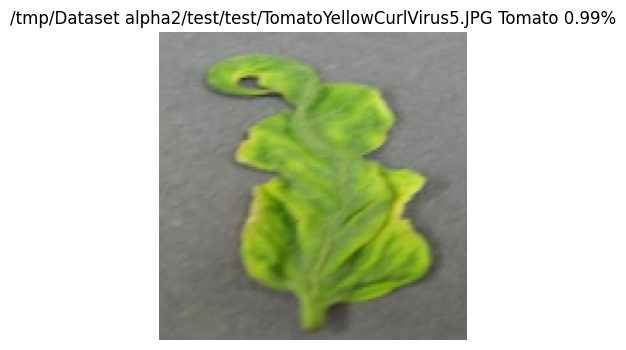

In [ ]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
directory='/tmp/Dataset alpha2/test/test'
files = [os.path.join(directory,p) for p in sorted(os.listdir(directory))]
plt.figure(figsize=(15,10))
for i in range(32):
    image_path = files[i]
    new_img =keras.utils.load_img(image_path, target_size=(128, 128))
    img = keras.utils.img_to_array(new_img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    prediction = new_model.predict(img)
    probabilty = prediction.flatten()
    max_prob = probabilty.max()
    index=prediction.argmax(axis=-1)[0]
    class_name = plant_classes[index]
    #ploting image with predicted class name
    plt.figure(figsize = (4,4))
    plt.imshow(new_img)
    plt.axis(False)
    plt.title(files[i]+" "+ class_name+" "+ str(max_prob)[0:4]+"%")
    plt.show()

1/1 [==============================] - 0s 25ms/step


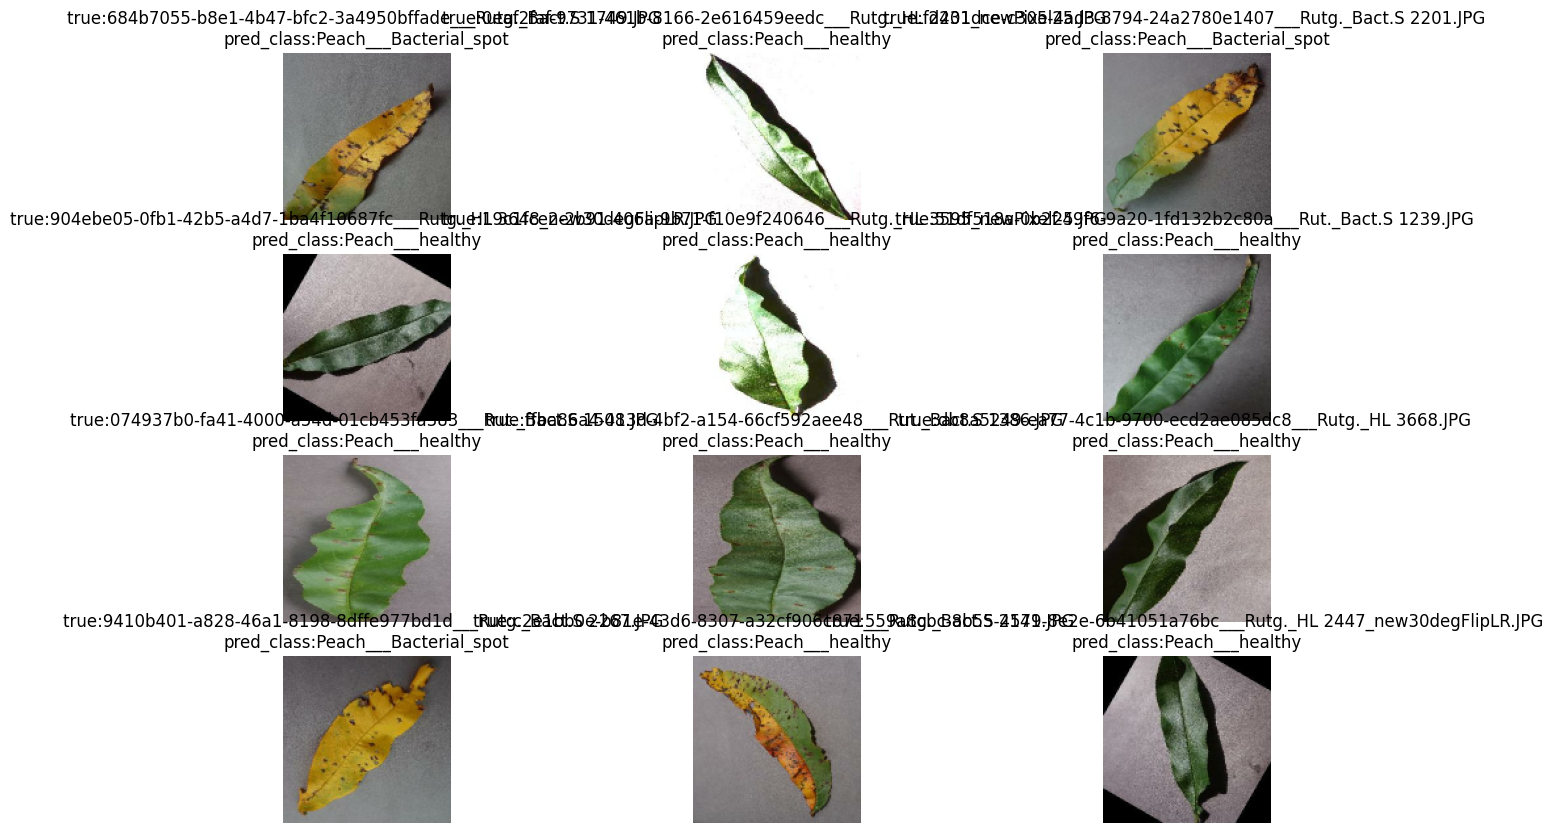

In [ ]:
data_dir='/tmp/Dataset alpha2/valid/Peach'
plt.figure(figsize=(15,10))
for i in range(12):
  plt.subplot(4,3,i+1)
  rn = random.choice((os.listdir(data_dir)))
  image_path=os.path.join(data_dir,rn)
  img = load_prep(image_path)
  pred = peach_model.predict(tf.expand_dims(img,axis=0))
  predicted_value = peach_classes[pred.argmax()]
  plt.imshow(img/255.)
  plt.title(f'true:{rn} \npred_class:{predicted_value}')
  plt.axis(False)

In [ ]:
# labels = []
# predictions = []
# for x,y in test_set:
#     labels.append(list(y.numpy()))
#     predictions.append(tf.argmax(strawberry_avg.predict(x),1).numpy())

In [ ]:
# def load_prep(img_path):
#   img = tf.io.read_file(img_path)
#   img = tf.image.decode_image(img)
#   img = tf.image.resize(img,size=(128,128))
#   return img
#/tmp/Dataset alpha2/valid/Grape/043920d3-0542-4bd7-a8e5-3807c04a5bdc___FAM_L.Blight 1461.JPG

In [ ]:
!kaggle datasets download -d harshart/balanced-plant-dataset

 99% 1.16G/1.17G [00:19<00:00, 49.2MB/s]
100% 1.17G/1.17G [00:19<00:00, 64.7MB/s]


In [ ]:
zip_ref = zipfile.ZipFile('balanced-plant-dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
Final_test_dir = "/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)/Testing"

In [ ]:
Final_test_it = tf.keras.utils.image_dataset_from_directory( directory= Final_test_dir,
                                                      batch_size=32,
                                                      image_size=(128, 128))

Found 15231 files belonging to 9 classes.


In [ ]:
rescale = Rescaling(scale=1./255)
Final_test_set  = Final_test_it.map(lambda image,label:(rescale(image),label))

In [ ]:
#image_path = ('/tmp/Dataset alpha2/valid/Grape/17572261-c800-42b7-8baf-2f73f7657578___Mt.N.V_HL 9009_new30degFlipLR.JPG')
new_img =keras.utils.load_img(Final_test_set, target_size=(128, 128))
img = keras.utils.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

In [ ]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
directory='/tmp/Dataset alpha2/test/test'
files = [os.path.join(directory,p) for p in sorted(os.listdir(directory))]
for i in range(32):
    image_path = files[i]
    new_img =keras.utils.load_img(image_path, target_size=(128, 128))
    img = keras.utils.img_to_array(new_img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    prediction = new_model.predict(img)
    probabilty = prediction.flatten()
    max_prob = probabilty.max()
    index=prediction.argmax(axis=-1)[0]
    class_name = plant_classes[index]
    print(class_name)
    # #ploting image with predicted class name
    # plt.figure(figsize = (4,4))
    # plt.imshow(new_img)
    # plt.axis(False)
    # plt.title(files[i]+" "+ class_name+" "+ str(max_prob)[0:4]+"%")
    # plt.show()

In [ ]:
labels = []
predictions = []
for x,y in Final_test_set:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(grape_model.predict(x),1).numpy())

'Tomato'

In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
def finalout1(Final_test_set,class_name):
  prediction = new_model.predict(img)
  probabilty = prediction.flatten()
  max_prob = probabilty.max()
  index=prediction.argmax(axis=-1)[0]
  class_name = plant_classes[index]

  DiseasedorHealthy(class_name,Final_test_set)
  return class_name #+" "+ image_path
#finalout(img,class_name)

In [ ]:
labels = []
predictions = []
for x,y in Final_test_set:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(grape_model.predict(x),1).numpy())

1/1 [==============================] - 0s 84ms/step
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)


InvalidArgumentError: ignored

In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
#print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Test Accuracy   : 97.67 %
Precision Score : 97.67 %
Recall Score    : 97.67 %


<Figure size 200x200 with 0 Axes>

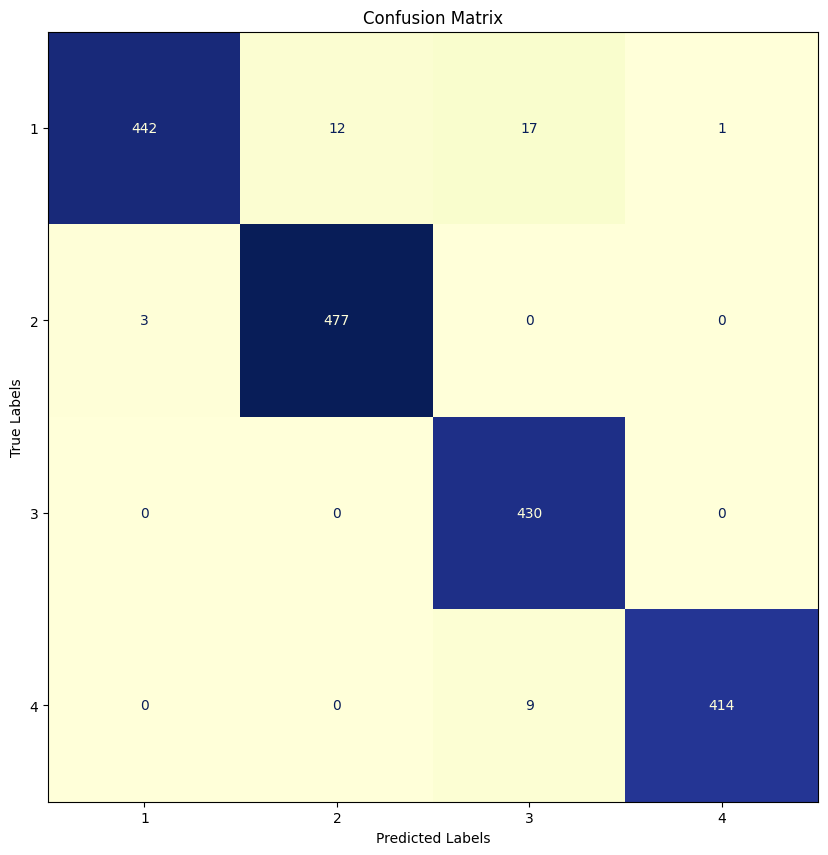

In [ ]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (2,2))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,5)))
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()